<img src="Logo.png" width="100" align="left"/> 

# <center> Unit 3 Project </center>
#  <center> First section : Data cleaning  </center>

In this notebook you will be cleaning your dataset and making sure it's fully ready for modeling.

The used dataset is [Hepatitis C  dataset](https://www.kaggle.com/fedesoriano/hepatitis-c-dataset)

## Data preparation 
As a first step we need to prepare the data :

1. Read the data set as a data frame ( file name is HepatitisCdata.csv) 
2. The here are the column of your dataset:
    1) X (Patient ID/No.)
    2) Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis') ( the target ) 
    3) Age (in years)
    4) Sex (f,m)
    Attributes 5 to 14 refer to laboratory data:
    5) ALB : Albumin Blood Test
    6) ALP : Alkaline phosphatase
    7) ALT : Alanine Transaminase
    8) AST : Aspartate Transaminase
    9) BIL : Bilirubin
    10) CHE : Acetylcholinesterase
    11) CHOL : Cholesterol
    12) CREA : Creatinine 
    13) GGT : Gamma-Glutamyl Transferase
    14) PROT : Proteins
    
3. Remember your model only accepts numbers so make sure you deal properly with the missing values and the data types and justify your solution choices 
 
4. Make sure the dataset shape in the end is : rows 615 and  14 columns 
 
5. Once finished save the cleaned dataset as "clean_HepatitisC.csv" file 
 

In [305]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import OrdinalEncoder

In [306]:
#To-Do: read the dataset 
data = pd.read_csv("HepatitisCdata.csv")

In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [308]:
#To-Do  Start investigating the data types and correcting that 
# Provide explanation about each step in Markdown cells 

1) We can notice that all our features are numerical except two : categories and sex , let's start with the easy one , the "sex" feature , all we have to do is use one-hot encoding , beacause since we can only have 2 possible values (m/f) we can encode it in binary (let's say f=0 and m= 1) :

In [309]:
data["Sex"]=pd.get_dummies(data,columns=["Sex"])["Sex_m"]
data["Sex"]

0      1
1      1
2      1
3      1
4      1
      ..
610    0
611    0
612    0
613    0
614    0
Name: Sex, Length: 615, dtype: uint8

2) Now for the "category" feature we already have a numerical equivalent, with one issue , 0 and 0s, in order to avoid confusion we will try and put the "suspect blood donor" as 4 :

In [310]:
ord_enc=OrdinalEncoder()
data["Category"]=ord_enc.fit_transform(data[["Category"]])
#This creates a slight shift in the numbers so we will fix that
for i in range(len(data["Category"])) :
    if data["Category"][i]==1 :
        data["Category"][i]=4
    if data["Category"][i]>=2 :
        data["Category"][i]=data["Category"][i]-1
data["Category"]


C:\Users\Crash\AppData\Local\Temp/ipykernel_1616/114475208.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Category"][i]=4
C:\Users\Crash\AppData\Local\Temp/ipykernel_1616/114475208.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Category"][i]=data["Category"][i]-1


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
610    3.0
611    3.0
612    3.0
613    3.0
614    3.0
Name: Category, Length: 615, dtype: float64

We should note that for these 2 features we have no missing values so that didn't create any issue

> Data types are all numeric Now ! Next we need to deal with missing values for the feature columns 

#To-Do list all the columns that contain missing values along with their counts 

In [311]:
data.isna().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

We can clearly see that the "ALB","ALT" and "PROT" features are each missing just one value , while "ALP" and "CHOL" are missing 18 and 10 values respectively.

In [312]:
# To-Do Start providing solutions for each column that has missing data 
# Treat each case seperately 
# Hint : no data row should be deleted 
# Provide evidence that you filled those missing values after each step 

### ALB,ALT and PROT :

We will replacing just 1 missing value which won't affect our distrubition that much (as long as we don't make an obvious outlier) which is why we will fill using the mode :

In [313]:
print(data["ALB"].mean())
print(data["ALT"].mean())
print(data["PROT"].mean())

41.62019543973941
28.450814332247557
72.0441368078176


In [314]:
data["ALB"]=data["ALB"].fillna(data["ALB"].mode()[0])
data["ALT"]=data["ALT"].fillna(data["ALT"].mode()[0])
data["PROT"]=data["PROT"].fillna(data["PROT"].mode()[0])

In [315]:
print(data["ALB"].mean())
print(data["ALT"].mean())
print(data["PROT"].mean())

41.615934959349595
28.43154471544715
72.0439024390244


We can see that the mean didn't change much after our operation

### ALP :

For the ALP feature we should see a boxplot to check our distribution than choose a suitable filling parameter :

In [316]:
print(data["ALP"].mean())
print(data.ALP.median())
print(data.ALP.mode())

68.28391959798995
66.2
0    52.5
1    61.2
Name: ALP, dtype: float64


c:\Users\Crash\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Crash\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ALP', ylabel='Density'>

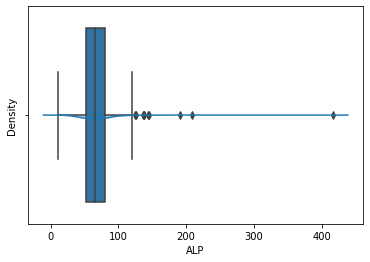

In [317]:
import seaborn as sns
#
# Box plot
#
sns.boxplot(data.ALP)
#
# Distribution plot
#
sns.distplot(data.ALP)

After tests , we notice that whatever we choose , it will become the new Mode , so as not to change that we will take one of the two mods so as not to change the new mode , also we will take the mode 61.2 because it's closer to the mean :

In [318]:
data.ALP=data.ALP.fillna(data.ALP.mode()[1])

In [319]:
print(data["ALP"].mean())
print(data.ALP.median())
print(data.ALP.mode())

68.07658536585367
65.3
0    61.2
Name: ALP, dtype: float64


We can see that our mean didn't change , but we should note that our mediane did change.

### CHOL :

Same thing applies to this feature :

In [320]:
print(data.CHOL.mean())
print(data.CHOL.median())
print(data.CHOL.mode())

5.368099173553719
5.3
0    5.07
1    5.10
Name: CHOL, dtype: float64


c:\Users\Crash\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Crash\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CHOL', ylabel='Density'>

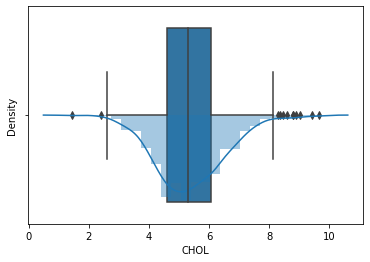

In [321]:
import seaborn as sns
#
# Box plot
#
sns.boxplot(data.CHOL)
#
# Distribution plot
#
sns.distplot(data.CHOL)

The same remarks as the last feature

In [322]:
data.CHOL=data.CHOL.fillna(data.CHOL.mode()[1])

In [323]:
print(data.CHOL.mean())
print(data.CHOL.median())
print(data.CHOL.mode())

5.363739837398374
5.29
0    5.1
Name: CHOL, dtype: float64


Now we re-check our data :

In [324]:
data.isna().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

> We have no more missing data
As an optional thing we can also rename the first column as 'index' or "ID" instead of Unnamed 

In [325]:
data.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [326]:
data.rename(columns={'Unnamed: 0': "ID"}, inplace=True)

In [327]:
data.columns

Index(['ID', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL',
       'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

### 6. Save the clean dataset :

In [330]:
# Don't forget to drop the index 
data=data.drop(["ID"],axis=1)

In [332]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    float64
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    uint8  
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(11), int64(1), uint8(1)
memory usage: 58.4 KB
